In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [26]:
items = pd.read_csv('items.csv')
ratings = pd.read_csv('ratings.csv')
sgd = pd.read_csv('segmentation data.csv')

In [6]:
items.head()

,jokeId,jokeText
0,1,"A man visits the doctor. The doctor says ""I ha..."
1,2,This couple had an excellent relationship goin...
2,3,Q. What's 200 feet long and has 4 teeth? \n\nA...
3,4,Q. What's the difference between a man and a t...
4,5,Q.\tWhat's O. J. Simpson's Internet address? \...


In [7]:
ratings.head()

,userId,jokeId,rating
0,1,5,0.219
1,1,7,-9.281
2,1,8,-9.281
3,1,13,-6.781
4,1,15,0.875


In [ ]:
df = pd.merge(ratings, items, on='jokeId')
df.head()

,userId,jokeId,rating,jokeText
0,1,5,0.219,Q.\tWhat's O. J. Simpson's Internet address? \...
1,2,5,-9.688,Q.\tWhat's O. J. Simpson's Internet address? \...
2,3,5,-9.844,Q.\tWhat's O. J. Simpson's Internet address? \...
3,4,5,-5.812,Q.\tWhat's O. J. Simpson's Internet address? \...
4,5,5,6.906,Q.\tWhat's O. J. Simpson's Internet address? \...


In [37]:
sgd.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
sgd = sgd.set_index('CustomerID')

CLUSTERING

In [39]:
sgd = sgd.rename(columns={'Annual Income (k$)': 'Income(k$)', 'Spending Score (1-100)':'SpendScore'})

In [40]:
sgd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      200 non-null    object
 1   Age         200 non-null    int64 
 2   Income(k$)  200 non-null    int64 
 3   SpendScore  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


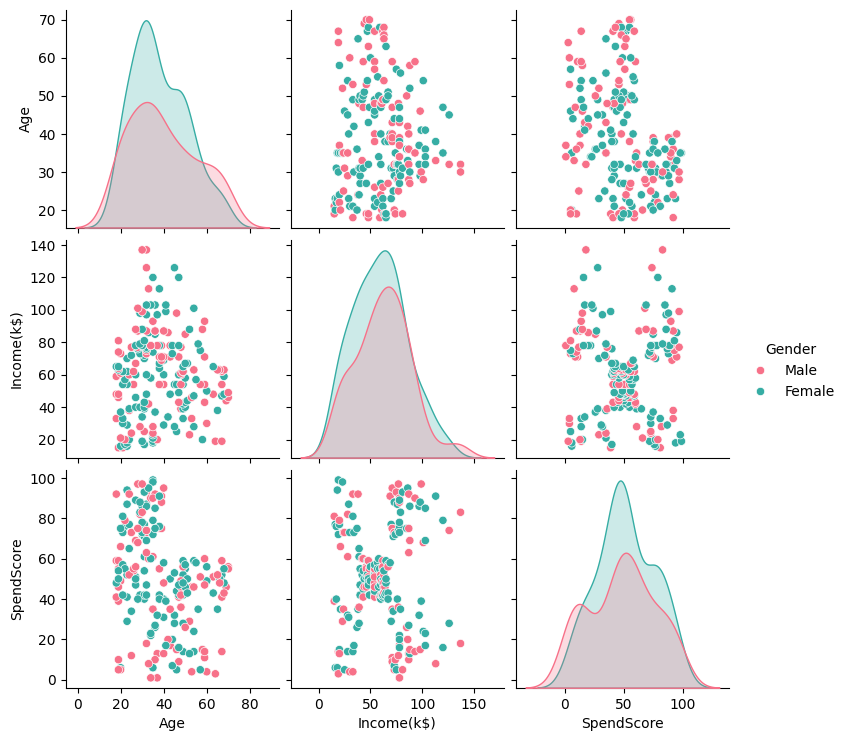

In [41]:
sns.pairplot(sgd , vars=['Age', 'Income(k$)', 'SpendScore'], hue='Gender', palette='husl')

<Axes: xlabel='Income(k$)', ylabel='SpendScore'>

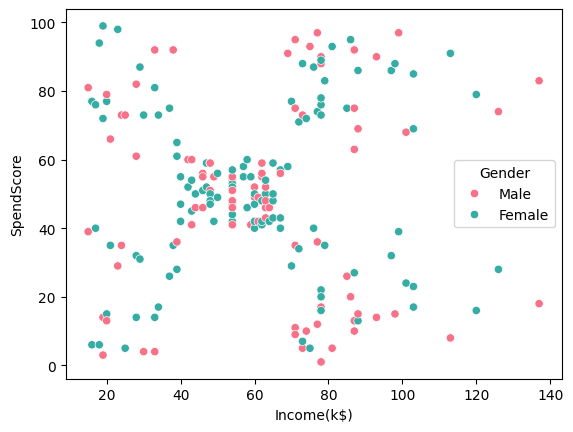

In [42]:
sns.scatterplot(data = sgd, x = 'Income(k$)', y = 'SpendScore', hue = 'Gender', palette='husl')

KMEANS

In [45]:
x = sgd.iloc[:, [2, 3]].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

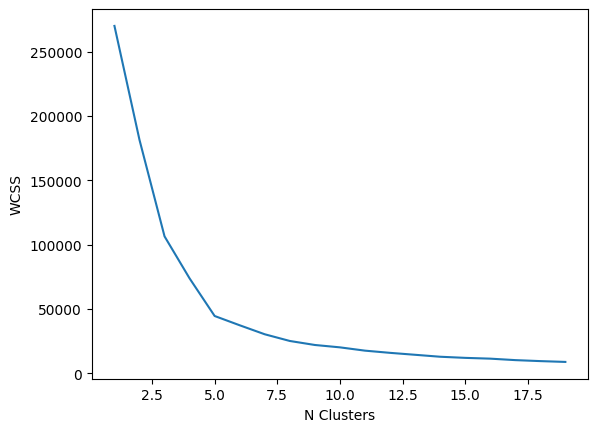

In [46]:
wcss = []

for i in range(1,20):
    model = KMeans(n_clusters=i, init='k-means++', random_state=42)
    model.fit(x)
    wcss.append(model.inertia_)

plt.plot(range(1, 20), wcss)
plt.xlabel('N Clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
kmeans = KMeans(n_clusters=5, random_state=42)
y = kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


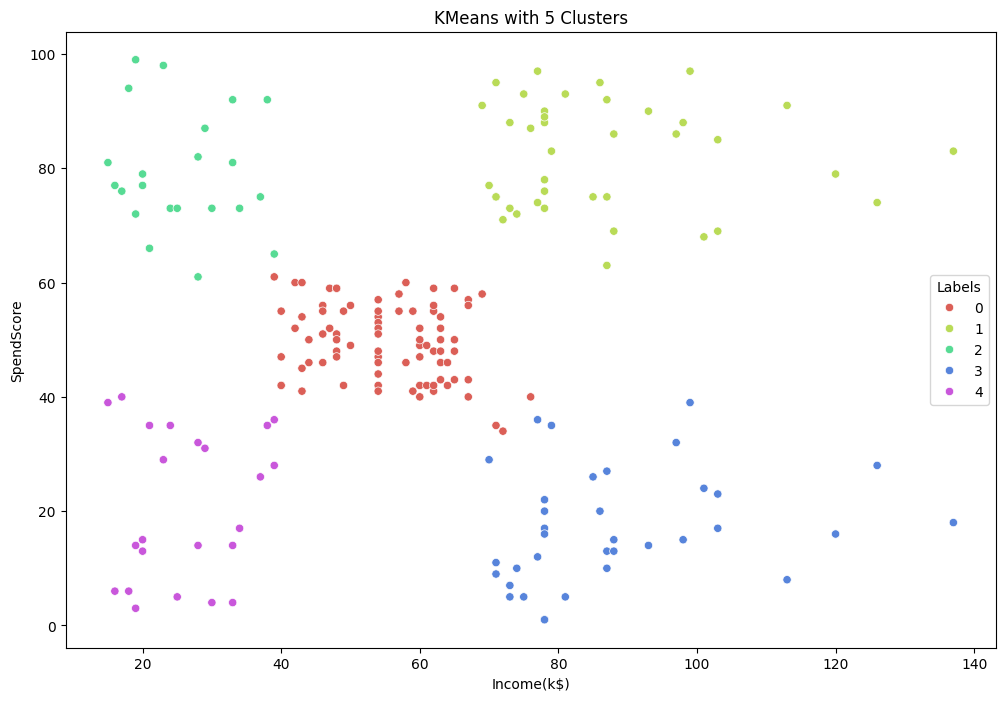

In [63]:
sgd['Labels'] = kmeans.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income(k$)', y='SpendScore', hue='Labels',
                data=sgd, palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

DBSCAN

In [64]:
X = sgd.iloc[:, [2, 3]].values

In [65]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=4)

In [66]:
model = dbscan.fit(X)

In [67]:
labels = model.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [69]:
metrics.silhouette_score(X, labels)

-0.1908319132560097

<ipython-input-87-bca7dfab0818>:6: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Income(k$)', y='SpendScore', hue='Labels',


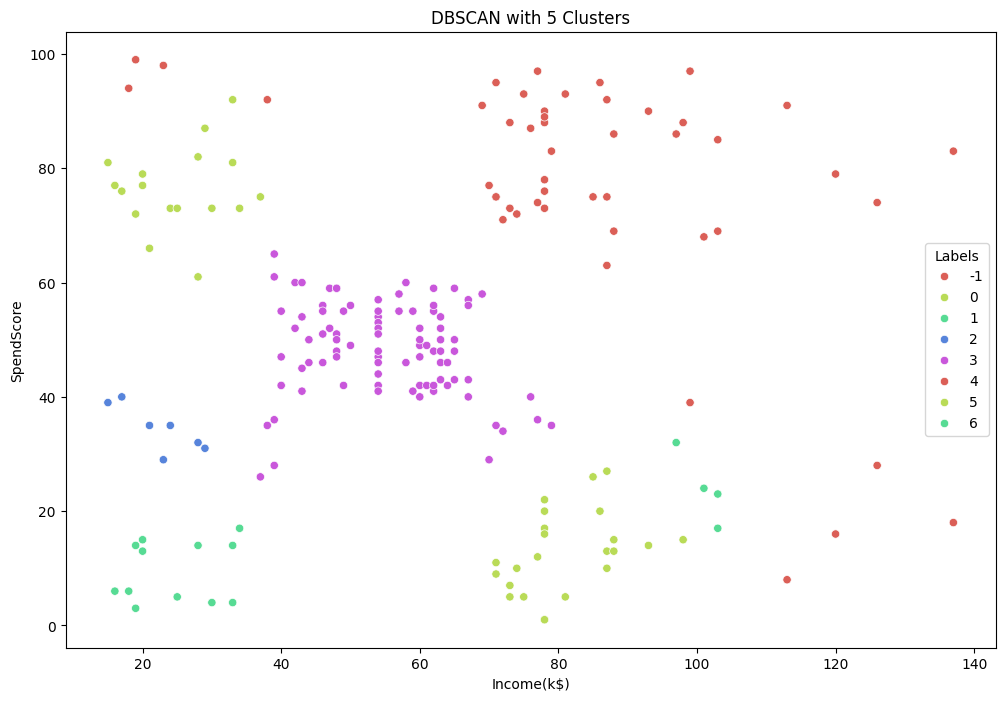

In [87]:
dbscan = DBSCAN(eps=9, min_samples=4).fit(X)


sgd['Labels'] = dbscan.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income(k$)', y='SpendScore', hue='Labels',
                data=sgd, palette=sns.color_palette('hls', 5))
plt.title('DBSCAN with 5 Clusters')
plt.show()

Agglomerative Clustering

In [84]:
agg_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


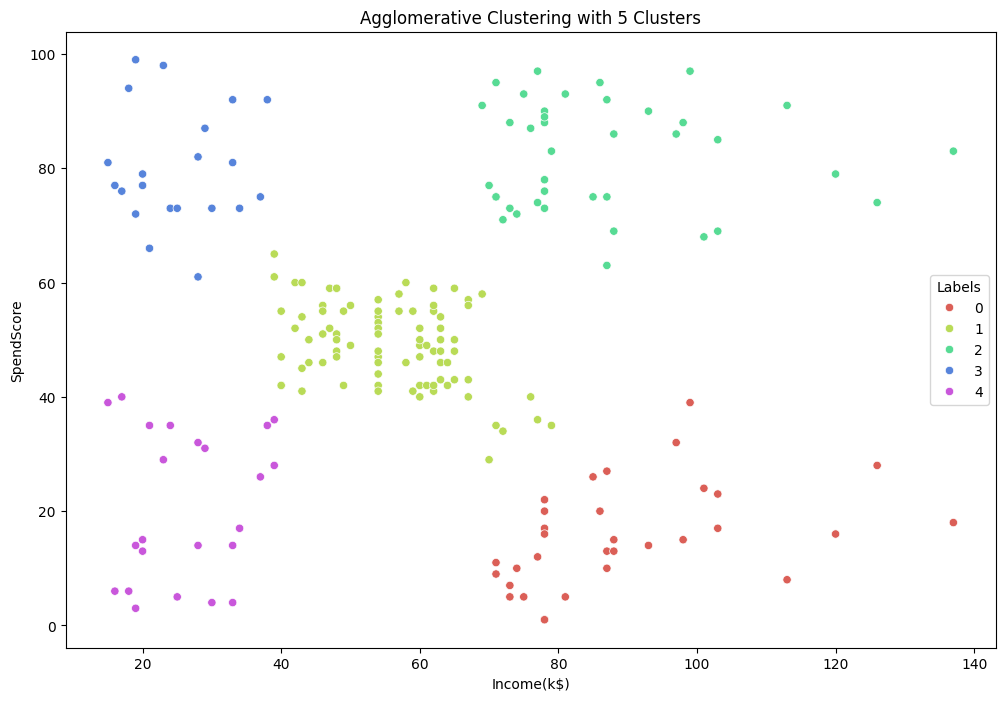

In [86]:
sgd['Labels'] = agg_model.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income(k$)', y='SpendScore', hue='Labels',
                data=sgd, palette=sns.color_palette('hls', 5))
plt.title('Agglomerative Clustering with 5 Clusters')
plt.show()

In [88]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

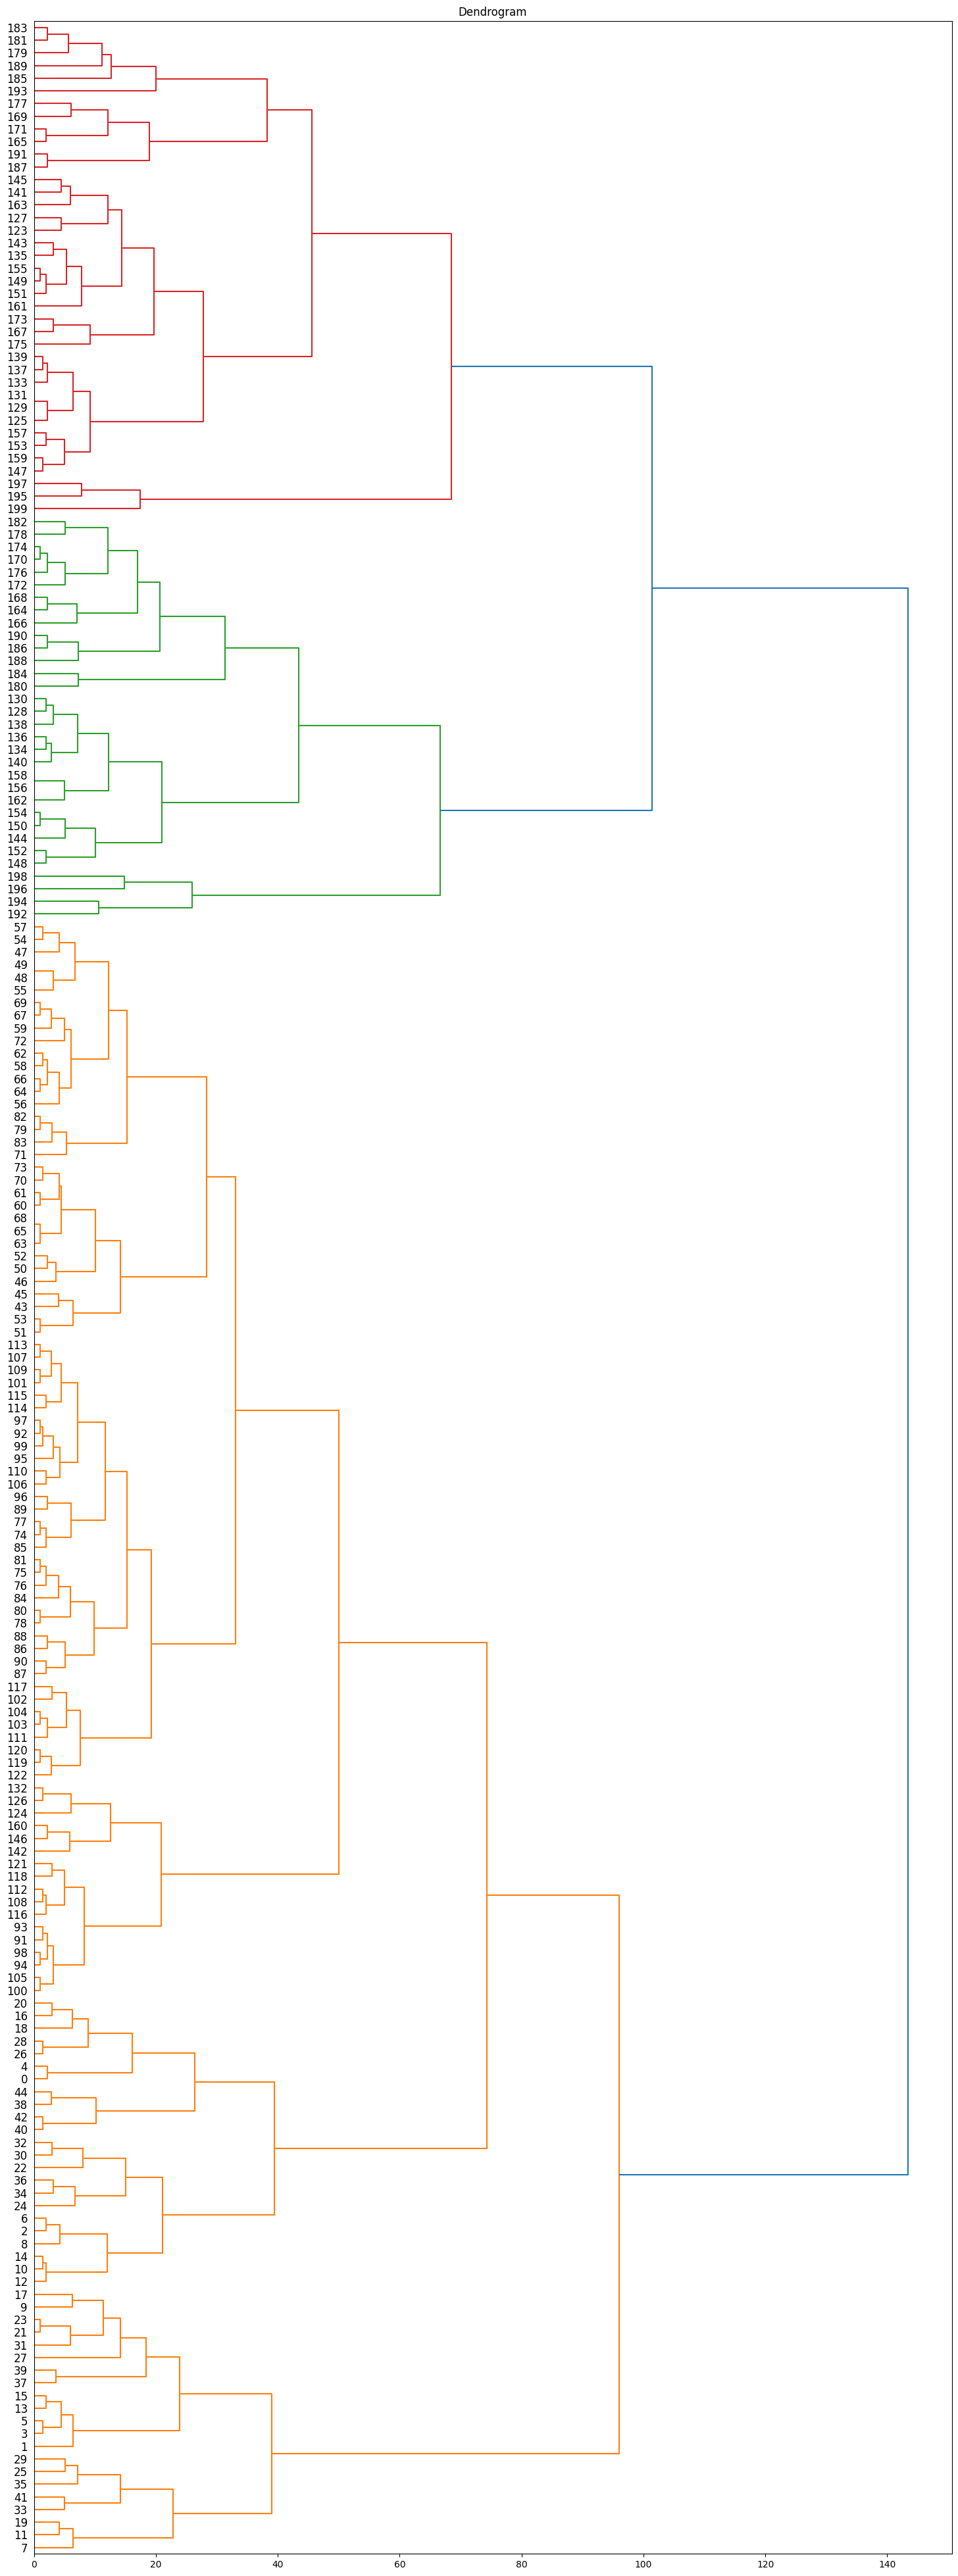

In [90]:
dist = pdist(X)
Z = linkage(dist, method='complete')

plt.figure(figsize=(18, 50))
dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation = 'right')
plt.title('Dendrogram')
plt.show()



CONCLUSÕES

- Podemos observar que existem 5 clusters bem definidos de acordo com a renda e os gastos.

- Temos então de acordo com o gráfico KMeans:
  - Grupo que podemos chamar de cauteloso (vermelho), com alta renda e com gastos baixos. Talvez seja um grupo para algum alvo de ação de marketign, por exemplo;
  - Grupo padrão (azul), com renda normal e gastos normais;
  - Grupo alvo (laranja), grupo com alta renda e altos gastos. São os clientes que o negócio deve focar em atender;
  - Grupo negligente (verde), com baixa renda e altos gastos. São clientes que podem estar se endividando ou endividados. Entretanto, estão consumindo bastante.
  - Grupo sensível (roxo), com baixa renda e baixo consumo. Não são os clientes foco do negócio.

- O grupo predominante é o padrão;

- Os clusters estão bem definidos em Income vs Spending, porém não existem padrões claros quanto a idade e gênero.


- O modelo DBSCAN não roda bem devido a baixa densidade e quantidade de dados.

Collaborative Filtering:

In [6]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357247 sha256=06094b2d6c08cbd62bf7552057f406a2361473708760553bfa876c436880e095
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [7]:
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise import SVDpp
from surprise import KNNBasic
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

In [8]:
ratings.head()

,userId,jokeId,rating
0,1,5,0.219
1,1,7,-9.281
2,1,8,-9.281
3,1,13,-6.781
4,1,15,0.875


In [9]:
reader = Reader(rating_scale=(-10, 10))
data = Dataset.load_from_df(ratings[['userId', 'jokeId', 'rating']], reader)

In [10]:
trainset, testset = train_test_split(data, test_size=0.25)

NORMAL PREDICTOR

In [ ]:
algo_np = NormalPredictor()
algo_np.fit(trainset)

In [ ]:
predictions_np = algo_np.test(testset)

In [ ]:
for prediction in predictions_np[0:5]:
    print(prediction)

user: 39383      item: 83         r_ui = -1.22   est = -7.70   {'was_impossible': False}
user: 47079      item: 145        r_ui = 5.81   est = -2.60   {'was_impossible': False}
user: 20014      item: 120        r_ui = -9.12   est = 3.87   {'was_impossible': False}
user: 29060      item: 35         r_ui = 4.25   est = -0.28   {'was_impossible': False}
user: 46016      item: 29         r_ui = 8.50   est = -1.34   {'was_impossible': False}


In [ ]:
accuracy.rmse(predictions_np)

RMSE: 7.2687


7.268657247182732

In [ ]:
cross_validate(algo_np, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    7.2704  7.2795  7.2650  7.2746  7.2748  7.2728  0.0049  
MAE (testset)     5.8812  5.8918  5.8740  5.8827  5.8805  5.8821  0.0057  
Fit time          3.01    5.03    4.82    4.77    4.06    4.34    0.74    
Test time         8.35    3.47    4.00    4.06    3.84    4.75    1.81    


{'test_rmse': array([7.27036064, 7.27948734, 7.26499836, 7.27458152, 7.27479926]),
 'test_mae': array([5.88122266, 5.89181189, 5.87402816, 5.88271389, 5.88053095]),
 'fit_time': (3.0100181102752686,
  5.03009295463562,
  4.8192243576049805,
  4.769157886505127,
  4.060973882675171),
 'test_time': (8.352180004119873,
  3.474398374557495,
  4.00219202041626,
  4.0561347007751465,
  3.8435187339782715)}

SVD

In [32]:
algo_svd = SVD()
algo_svd.fit(trainset)

In [33]:
predictions_svd = algo_svd.test(testset)

In [34]:
for prediction_svd in predictions_svd[0:5]:
    print(prediction_svd)

user: 24786      item: 66         r_ui = 2.47   est = 4.41   {'was_impossible': False}
user: 37410      item: 69         r_ui = 1.38   est = 3.57   {'was_impossible': False}
user: 27996      item: 19         r_ui = 4.66   est = 3.72   {'was_impossible': False}
user: 3958       item: 120        r_ui = -9.84   est = -6.32   {'was_impossible': False}
user: 21334      item: 89         r_ui = 6.78   est = 4.11   {'was_impossible': False}


In [35]:
accuracy.rmse(predictions_svd)

RMSE: 4.4751


4.47507272357599

In [37]:
cross_validate(algo_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.5111  4.5076  4.4945  4.5010  4.5081  4.5045  0.0060  
MAE (testset)     3.3824  3.3757  3.3713  3.3749  3.3761  3.3761  0.0036  
Fit time          30.95   31.76   33.50   31.39   31.93   31.91   0.86    
Test time         5.78    5.16    4.56    4.55    5.09    5.03    0.46    


{'test_rmse': array([4.5110765 , 4.50761589, 4.4945485 , 4.50100502, 4.50812471]),
 'test_mae': array([3.38235394, 3.37572755, 3.37125099, 3.3748636 , 3.37606253]),
 'fit_time': (30.95472288131714,
  31.75862216949463,
  33.496479988098145,
  31.388017892837524,
  31.933950185775757),
 'test_time': (5.784632921218872,
  5.159741163253784,
  4.5576183795928955,
  4.545468807220459,
  5.086054563522339)}

SVDpp

In [ ]:
algo_svdpp = SVDpp()
algo_svdpp.fit(trainset)

In [ ]:
predictions_svdpp = algo_svdpp.test(testset)

In [ ]:
for prediction_svdpp in predictions_svdpp[0:10]:
    print(prediction_svdpp)

user: 39383      item: 83         r_ui = -1.22   est = -0.13   {'was_impossible': False}
user: 47079      item: 145        r_ui = 5.81   est = 0.30   {'was_impossible': False}
user: 20014      item: 120        r_ui = -9.12   est = -2.41   {'was_impossible': False}
user: 29060      item: 35         r_ui = 4.25   est = 3.25   {'was_impossible': False}
user: 46016      item: 29         r_ui = 8.50   est = 8.63   {'was_impossible': False}
user: 6205       item: 121        r_ui = 0.44   est = 3.51   {'was_impossible': False}
user: 38827      item: 28         r_ui = 7.31   est = 4.18   {'was_impossible': False}
user: 14518      item: 65         r_ui = -4.34   est = -2.59   {'was_impossible': False}
user: 16920      item: 106        r_ui = -2.19   est = -3.14   {'was_impossible': False}
user: 7679       item: 17         r_ui = 3.53   est = 1.07   {'was_impossible': False}


In [ ]:
accuracy.rmse(predictions_svdpp)

RMSE: 4.9273


4.927304260989093

In [ ]:
cross_validate(algo_svdpp, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.9173  4.9115  4.9040  4.9260  4.8920  4.9102  0.0116  
MAE (testset)     3.6517  3.6419  3.6194  3.6499  3.6176  3.6361  0.0148  
Fit time          172.37  171.43  176.01  169.65  169.00  171.69  2.47    
Test time         45.86   45.35   40.00   42.56   38.82   42.52   2.80    


{'test_rmse': array([4.91733961, 4.91151529, 4.90395365, 4.92595701, 4.89204084]),
 'test_mae': array([3.65171027, 3.64194836, 3.61942717, 3.6499081 , 3.61758945]),
 'fit_time': (172.37124133110046,
  171.42657995224,
  176.00866770744324,
  169.6548273563385,
  169.00441932678223),
 'test_time': (45.86442017555237,
  45.3543426990509,
  40.0032217502594,
  42.563822746276855,
  38.819053411483765)}

MUDANDO ESCALA DOS RATINGS PARA 0-1

In [40]:
ratings['rating_scaled'] = (ratings['rating'] - (-10)) / (10 - (-10))

reader = Reader(rating_scale=(0, 1))
ndata = Dataset.load_from_df(ratings[['userId', 'jokeId', 'rating_scaled']], reader)

In [12]:
trainset_novo, testset_novo = train_test_split(ndata, test_size=0.25)

NORMAL PREDICTOR (0-1)



In [14]:
algo_np1 = NormalPredictor()
algo_np1.fit(trainset_novo)

In [15]:
predictions_np1 = algo_np1.test(testset_novo)

In [16]:
for prediction in predictions_np1[0:10]:
    print(prediction)

user: 62         item: 103        r_ui = 0.97   est = 0.51   {'was_impossible': False}
user: 22738      item: 125        r_ui = 0.46   est = 0.75   {'was_impossible': False}
user: 11344      item: 129        r_ui = 0.44   est = 1.00   {'was_impossible': False}
user: 9246       item: 109        r_ui = 0.82   est = 0.94   {'was_impossible': False}
user: 57136      item: 56         r_ui = 0.70   est = 0.63   {'was_impossible': False}
user: 53060      item: 144        r_ui = 0.74   est = 0.29   {'was_impossible': False}
user: 4602       item: 120        r_ui = 0.95   est = 0.04   {'was_impossible': False}
user: 4881       item: 97         r_ui = 0.13   est = 0.60   {'was_impossible': False}
user: 1887       item: 127        r_ui = 0.75   est = 0.44   {'was_impossible': False}
user: 28094      item: 118        r_ui = 0.03   est = 0.48   {'was_impossible': False}


In [17]:
accuracy.rmse(predictions_np1)

RMSE: 0.3632


0.36317815302440065

In [18]:
cross_validate(algo_np1, ndata, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3636  0.3633  0.3637  0.3636  0.3633  0.3635  0.0002  
MAE (testset)     0.2941  0.2939  0.2940  0.2939  0.2939  0.2939  0.0001  
Fit time          2.62    4.07    3.54    4.42    4.02    3.73    0.62    
Test time         3.61    3.44    5.57    7.10    3.43    4.63    1.47    


{'test_rmse': array([0.36360894, 0.3632615 , 0.36371864, 0.36358272, 0.36332029]),
 'test_mae': array([0.29412099, 0.29387189, 0.29396117, 0.29385799, 0.29386953]),
 'fit_time': (2.6242141723632812,
  4.0689857006073,
  3.5425772666931152,
  4.418835878372192,
  4.0181920528411865),
 'test_time': (3.6117305755615234,
  3.44294810295105,
  5.567779541015625,
  7.095741271972656,
  3.434250593185425)}

SVD (0-1)

In [13]:
algo_svd1 = SVD()
algo_svd1.fit(trainset_novo)

In [14]:
predictions_svd1 = algo_svd1.test(testset_novo)

In [15]:
for prediction_svd in predictions_svd1[0:10]:
    print(prediction_svd)

user: 28761      item: 119        r_ui = 0.16   est = 0.56   {'was_impossible': False}
user: 1817       item: 65         r_ui = 0.05   est = 0.16   {'was_impossible': False}
user: 44109      item: 7          r_ui = 0.30   est = 0.46   {'was_impossible': False}
user: 49666      item: 35         r_ui = 0.59   est = 0.49   {'was_impossible': False}
user: 31753      item: 81         r_ui = 0.87   est = 0.67   {'was_impossible': False}
user: 34015      item: 18         r_ui = 0.94   est = 0.67   {'was_impossible': False}
user: 13856      item: 65         r_ui = 0.88   est = 0.89   {'was_impossible': False}
user: 56507      item: 15         r_ui = 0.24   est = 0.30   {'was_impossible': False}
user: 37360      item: 15         r_ui = 0.35   est = 0.39   {'was_impossible': False}
user: 19885      item: 134        r_ui = 0.99   est = 0.78   {'was_impossible': False}


In [16]:
accuracy.rmse(predictions_svd1)

RMSE: 0.2149


0.2149258030074293

In [23]:
cross_validate(algo_svd1, ndata, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2138  0.2138  0.2143  0.2140  0.2146  0.2141  0.0003  
MAE (testset)     0.1662  0.1661  0.1665  0.1662  0.1666  0.1663  0.0002  
Fit time          34.86   35.27   41.17   48.56   35.91   39.15   5.23    
Test time         5.37    6.15    12.27   5.77    4.95    6.90    2.71    


{'test_rmse': array([0.21375369, 0.21380428, 0.21428161, 0.21401152, 0.21456765]),
 'test_mae': array([0.16619406, 0.16614927, 0.16646711, 0.16616154, 0.16658145]),
 'fit_time': (34.859161615371704,
  35.27214336395264,
  41.17426919937134,
  48.55862474441528,
  35.909910678863525),
 'test_time': (5.365255355834961,
  6.1497907638549805,
  12.265649318695068,
  5.771057605743408,
  4.954895496368408)}

SVDpp (0-1)

In [24]:
algo_svdpp1 = SVDpp()
algo_svdpp1.fit(trainset_novo)

In [25]:
predictions_svdpp1 = algo_svdpp1.test(testset_novo)

In [26]:
for prediction_svdpp in predictions_svdpp1[0:10]:
    print(prediction_svdpp)

user: 62         item: 103        r_ui = 0.97   est = 0.52   {'was_impossible': False}
user: 22738      item: 125        r_ui = 0.46   est = 0.58   {'was_impossible': False}
user: 11344      item: 129        r_ui = 0.44   est = 0.60   {'was_impossible': False}
user: 9246       item: 109        r_ui = 0.82   est = 0.74   {'was_impossible': False}
user: 57136      item: 56         r_ui = 0.70   est = 0.62   {'was_impossible': False}
user: 53060      item: 144        r_ui = 0.74   est = 0.62   {'was_impossible': False}
user: 4602       item: 120        r_ui = 0.95   est = 0.92   {'was_impossible': False}
user: 4881       item: 97         r_ui = 0.13   est = 0.20   {'was_impossible': False}
user: 1887       item: 127        r_ui = 0.75   est = 0.69   {'was_impossible': False}
user: 28094      item: 118        r_ui = 0.03   est = 0.27   {'was_impossible': False}


In [27]:
accuracy.rmse(predictions_svdpp1)

RMSE: 0.2142


0.21419853319043627

In [28]:
cross_validate(algo_svdpp1, ndata, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2142  0.2140  0.2144  0.2140  0.2139  0.2141  0.0002  
MAE (testset)     0.1657  0.1653  0.1655  0.1656  0.1655  0.1655  0.0001  
Fit time          175.09  173.48  172.12  173.60  172.76  173.41  1.00    
Test time         43.74   41.91   45.70   46.06   46.14   44.71   1.65    


{'test_rmse': array([0.21420265, 0.21395846, 0.21441222, 0.21398901, 0.21389157]),
 'test_mae': array([0.16569369, 0.16525753, 0.16550586, 0.16558023, 0.16545985]),
 'fit_time': (175.09144473075867,
  173.48171496391296,
  172.1155321598053,
  173.60272789001465,
  172.7632224559784),
 'test_time': (43.74269771575928,
  41.9053590297699,
  45.70112586021423,
  46.057655334472656,
  46.140684366226196)}

Vamos trabalhar com as recomendações nos dados normalizados com ratings entre 0 e 1



In [27]:
items.head()

,jokeId,jokeText
0,1,"A man visits the doctor. The doctor says ""I ha..."
1,2,This couple had an excellent relationship goin...
2,3,Q. What's 200 feet long and has 4 teeth? \n\nA...
3,4,Q. What's the difference between a man and a t...
4,5,Q.\tWhat's O. J. Simpson's Internet address? \...


In [71]:
#agrupando por dos media dos ratings e usuarios
mean_ratings = ratings.groupby('userId')['rating'].mean()

In [74]:
quantiles = mean_ratings.quantile([0.25, 0.5, 0.75])
low_user = mean_ratings[mean_ratings <= quantiles[0.25]].index[0] # usuario que costuma dar notas baixas
mid_user = mean_ratings[(mean_ratings > quantiles[0.25]) & (mean_ratings <= quantiles[0.5])].index[0] # usuario que dá notas médias
high_user = mean_ratings[mean_ratings > quantiles[0.75]].index[0] # usuario que costuma dar notas baixas

selected_users = [low_user, mid_user, high_user]
print(f'Usuarios selecionados: {selected_users}')

Usuarios selecionados: [3, 11, 2]


In [3]:
mapping = dict(zip(items['jokeId'],items['jokeText']))

In [18]:
#lista dos usuarios a partir das previsoes
uids = [pred.uid for pred in predictions_svd1]
users=list(set(uids))

In [73]:
#Recomendações de 5 jokes para os 3 usuários selecionados acima
import operator
items_array = np.array(trainset_novo.build_anti_testset())

for user in selected_users:
    user_items = items_array[np.where(items_array[:, 0] == user)[0]]
    print()
    print(user, len(user_items))
    recommendations = algo_svd1.test(user_items.tolist())
    recommendations.sort(key=operator.itemgetter(3), reverse=True)
    print(f"User {user} recommendations:")
    for r in recommendations[0:5]:
        print(f" [Title] {mapping.get(r[1], 'Unknown')}, [Estimated Rating] {round(r[3], 3)}")



3 129
User 3 recommendations:
 [Title]  President Clinton looks up from his desk in the Oval Office to see
 one of his aides nervously approach him. 
 "What is it?" exclaims the President. 
"It's this Abortion Bill Mr. President, what do you want to do
 about it?" the aide replies. 
"Just go ahead and pay it." responds the President. 
, [Estimated Rating] 0.469
 [Title] A man in a hot air balloon realized he was lost. He reduced altitude and spotted a woman below. He descended a bit more and shouted, "Excuse me, can you help me? I promised a friend I would meet him an hour ago, but I don't know where I am." The woman below replied, "You are in a hot air balloon hovering approximately 30 feet above the ground. You are between 40 and 41 degrees north latitude and between 59 and 60 degrees west longitude." "You must be an engineer," said the balloonist. "I am," replied the woman. "How did you know?" "Well," answered the balloonist, "everything you told me is technically correct, but I ha